#### The Sparks Foundation
#### TASK -2 Prediction using Decision Tree Algorithm
#### Devansh Agrawal
#### GRIP_MARCH_22

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

Reading the data

In [2]:
data = pd.read_csv('Iris.csv')

Displaying data

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Data Visualization & Data Cleaning (if needed)

In [4]:
data.shape

(150, 6)

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Converting the Species column to Numerical

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
data["Species"]=le.fit_transform(data["Species"])

In [13]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [14]:
data.shape

(150, 6)

In [15]:
data["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [16]:
x=data.drop(["Id","Species"],axis=1)
y=data["Species"]

In [17]:
print("X data ",x.shape)
print("Y data ",y.shape)

X data  (150, 4)
Y data  (150,)


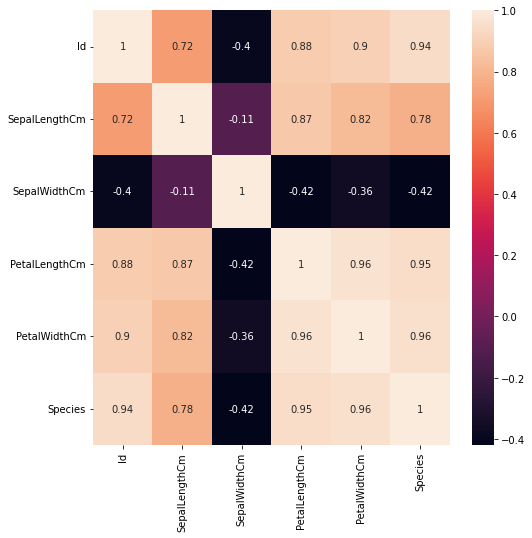

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

Splitting data into Training & Testing

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


Importing Decision Tree Model

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred=model.predict(x_test)
print(accuracy_score(y_pred,y_test))

1.0


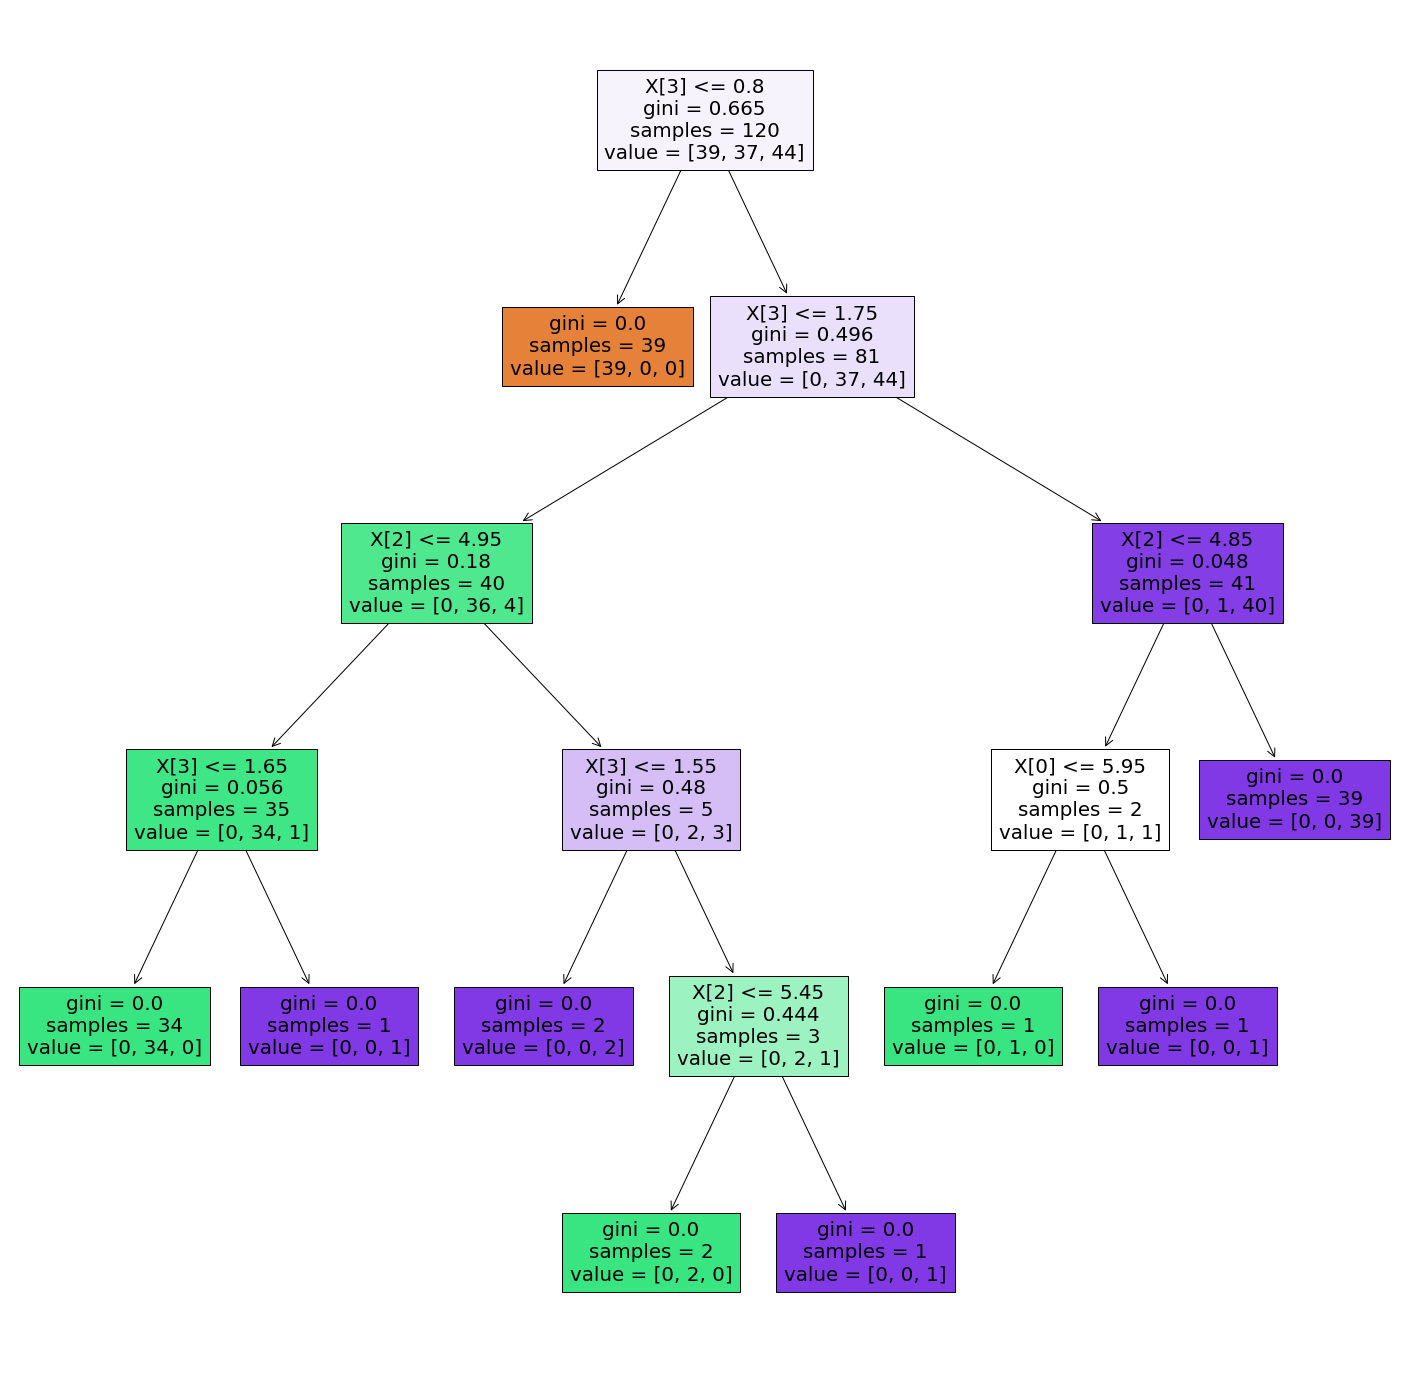

In [25]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,25))
_=plot_tree(model,filled=True)

In [26]:
input=(4.7,3.1,1.3,0.2)

input_to_numpy_array=np.asarray(input)

reshaped_array=input_to_numpy_array.reshape(1,-1)
prediction=model.predict(reshaped_array)
print(prediction)

if (prediction[0]==0):
    print("Iris-setosa")
elif(prediction[0]==1):
    print("Iris-versicolor")
else:
    print("Iris-virginica")

[0]
Iris-setosa


C:\Users\91900\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
